<a href="https://colab.research.google.com/github/johanaluna/DS7-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Johana_DS7_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [44]:
import pandas as pd
#Load the data as a pandas data frame.

data_url= 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data' #save in a varible the URL of the data
df=pd.read_csv(data_url, header=None) 

#Validate that it has the appropriate number of observations
print(df.shape)
df.head(10)


(306, 4)


,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [45]:
df.tail()# check last rows

,0,1,2,3
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [46]:
#Add informative names to the features.
ycolumns=['age','year_operation','positive_nodes','survival_status'] # name of the columns
df.columns=mycolumns
df.head(15)

,age,year_operation,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [47]:
#Validate that you have no missing values

df.count() #return the number of elements that are in train_data
#Data is complete

age                306
year_operation     306
positive_nodes     306
survival_status    306
dtype: int64

In [48]:
df.isna().sum() #There are not NAN values

age                0
year_operation     0
positive_nodes     0
survival_status    0
dtype: int64

In [49]:
#The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving
# and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

#Check type of data
df.dtypes

age                int64
year_operation     int64
positive_nodes     int64
survival_status    int64
dtype: object

In [51]:
df['survival_status']= df['survival_status'].apply({1:1, 2:0}.get)
df.head()

,age,year_operation,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [96]:
nodos_bins = pd.cut(df['positive_nodes'], 10, precision=0)#group the nodos
age_bins = pd.cut(df['age'], 6,precision=0)#group the age

#Age vs Survival Status
crosstab_age_survivalstatus= pd.crosstab(age_bins, df['survival_status'], normalize='columns')
print(crosstab_age_survivalstatus)

#Survaival=1 Yes
#survival=0 Not

survival_status         0         1
age                                
(30.0, 39.0]     0.037037  0.137778
(39.0, 48.0]     0.283951  0.222222
(48.0, 56.0]     0.333333  0.280000
(56.0, 65.0]     0.209877  0.240000
(65.0, 74.0]     0.111111  0.106667
(74.0, 83.0]     0.024691  0.013333


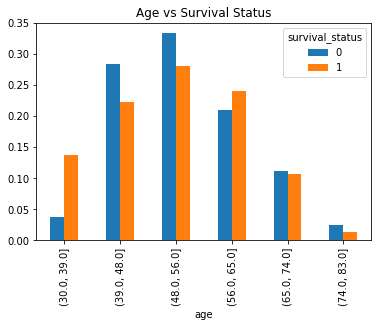

In [101]:
crosstab_age_survivalstatus.plot(kind='bar', title='Age vs Survival Status');



In [147]:
#survival_status vs positive_nodes
crosstab_survivalstatus_nodos= pd.crosstab(df['survival_status'], nodos_bins , normalize='columns').T
print(crosstab_survivalstatus_nodos)


survival_status         0         1
positive_nodes                     
(-0.1, 5.0]      0.194915  0.805085
(5.0, 10.0]      0.400000  0.600000
(10.0, 16.0]     0.611111  0.388889
(16.0, 21.0]     0.500000  0.500000
(21.0, 26.0]     0.666667  0.333333
(26.0, 31.0]     0.000000  1.000000
(31.0, 36.0]     1.000000  0.000000
(42.0, 47.0]     0.000000  1.000000
(47.0, 52.0]     1.000000  0.000000


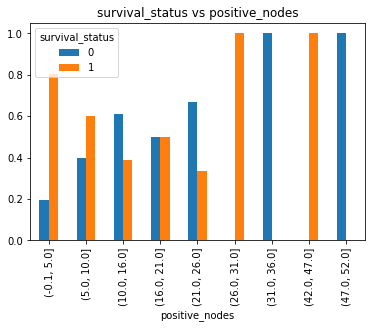

In [148]:
import seaborn as sns
crosstab_survivalstatus_nodos.plot(kind='bar', title='survival_status vs positive_nodes');

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [112]:
#Data FRame survival
survival = df[(df['survival_status'] == 1)]
print(survival.shape)
survival.head(20)


(225, 4)


,age,year_operation,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
9,34,58,30,1
10,34,60,1,1
11,34,61,10,1


In [124]:
##Data FRame Died
died = df[(df['survival_status'] == 0)]
print(died.shape)
died.head(20)

(81, 4)


,age,year_operation,positive_nodes,survival_status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0
44,41,64,0,0
45,41,67,0,0
53,42,69,1,0
54,42,59,0,0
62,43,58,52,0


In [134]:
#Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age 
#and Number of Positive Axillary Nodes Detected between the two groups.
age_bins = pd.cut(survival['age'], 5)

#Crosstab with the number of nodes and the age from Survival table
crosstab_survival_age=pd.crosstab(age_bins, survival['positive_nodes'] ) #normalize=True shows the data in terms of %
print(crosstab_survival_age)

positive_nodes  0   1   2   3   4   5   6  ...  19  20  22  25  28  30  46
age                                        ...                            
(29.953, 39.4]  15   5   3   2   2   1   1 ...   0   0   0   0   0   1   0
(39.4, 48.8]    24   4   5   3   4   0   1 ...   0   1   0   0   0   0   0
(48.8, 58.2]    33  19   4   5   3   1   1 ...   1   0   1   0   0   0   1
(58.2, 67.6]    31   4   2   1   1   0   1 ...   0   0   1   1   1   0   0
(67.6, 77.0]    14   1   1   2   0   0   0 ...   0   0   0   0   0   0   0

[5 rows x 25 columns]


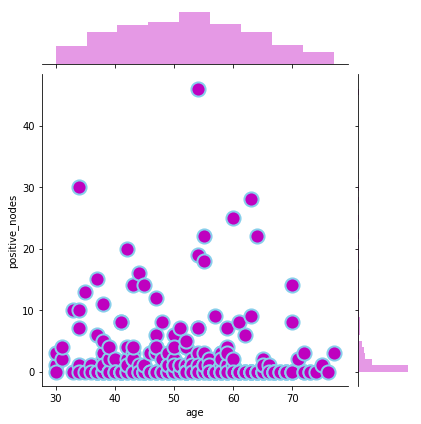

In [162]:
# At a lower number of nodes there is a greater chance of survival
sns.jointplot(y=survival['positive_nodes'], x=survival['age'], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2);


In [160]:
#Crosstab with the number of nodes and the age from NOT Survival table

age_bins_d = pd.cut(died['age'], 5)

crosstab_died_year=pd.crosstab(age_bins_d, died['positive_nodes'], margins=True, margins_name='Total').T #normalize=True shows the data in terms of %
print(crosstab_died_year)

age             (33.951, 43.8]  (43.8, 53.6]  ...    (73.2, 83.0]  Total
positive_nodes                                ...                       
0                            7             5  ...               0     19
1                            1             2  ...               1      8
2                            1             2  ...               1      5
3                            0             5  ...               1      7
4                            0             2  ...               0      3
5                            0             1  ...               0      4
6                            0             2  ...               0      3
7                            0             1  ...               0      2
8                            0             0  ...               0      2
9                            1             2  ...               0      4
10                           0             1  ...               0      1
11                           0             2  ...  

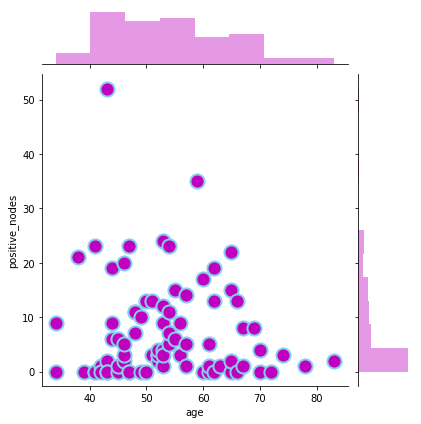

In [163]:
# At a lower number of nodes there is a greater chance of survival
sns.jointplot(y=died['positive_nodes'], x=died['age'], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2);


## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

In [0]:
# Any Supplemental Code for Analysis Here


#What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
#With a smaller number of nodes there is a higher percentage of survival

#What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
# Age is negatively correctad with the survival(the older the people less survival percentage)


#How are those two features related with each other, and what might that mean?
#number of node and Survival
